In [415]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import os
from sys import platform

 Table

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `test.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need: id and price
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [416]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [417]:
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
27921,27921,0.32,Ideal,G,VS1,61.8,55.0,4.42,4.45,2.74,6.326


In [418]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
2800,2800,1.26,Premium,F,VS1,62.7,58.0,6.86,6.93,4.32


In [419]:
df_train.shape

(40455, 11)

In [420]:
df_test.shape

(13485, 10)

In [421]:
#SUBMISSION -> test

In [422]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
8917,8917,0.7,Ideal,I,VVS2,61.8,56.0,5.69,5.75,3.54,7.836


# Cleaning, processing, feature selection, etc

In [423]:
cut_dict = {'Good': 1,
            'Very Good': 2, 
            'Premium': 3, 
            'Ideal': 4, 
            'Fair': 5}
    
df_train["cut"] = df_train.cut.replace(cut_dict)
df_test["cut"] = df_test.cut.replace(cut_dict)

clarity_dict = {
            'I1': 1,
            'SI2': 2,
            'SI1': 3, 
            'VS2': 4, 
            'VS1': 5, 
            'VVS2': 6,
            'VVS1': 7,
            'IF': 8
            }
    
df_train["clarity"] = df_train.cut.replace(clarity_dict)
df_test["clarity"] = df_test.cut.replace(clarity_dict)
df_test.drop(columns="carat", inplace=True)
df_train.drop(columns="carat", inplace=True)
df_test.drop(columns="y", inplace=True)
df_train.drop(columns="y", inplace=True)
df_test.drop(columns="x", inplace=True)
df_train.drop(columns="x", inplace=True)
df_test.drop(columns="cut", inplace=True)
df_train.drop(columns="cut", inplace=True)

In [424]:
oneonehotencoder = preprocessing.OneHotEncoder()
df_train[["D","H","E","G","F","I","J"]] = oneonehotencoder.fit_transform(df_train[["color"]].values.reshape(-1, 1)).toarray()
df_test[["D","H","E","G","F","I","J"]] = oneonehotencoder.fit_transform(df_test[["color"]].values.reshape(-1, 1)).toarray()
df_train.drop(columns = ["color"], inplace=True)
df_test.drop(columns = ["color"], inplace=True)

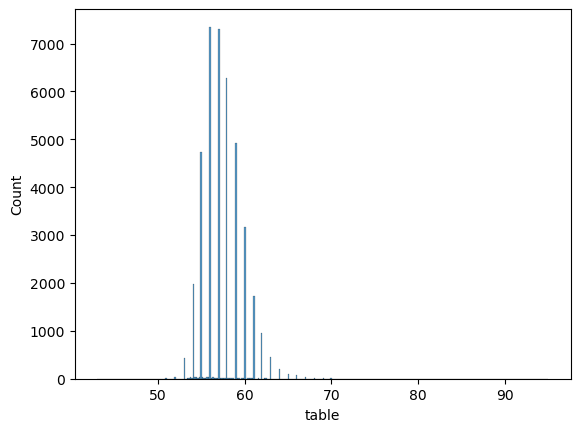

In [425]:
sns.histplot(x=df_train.table);

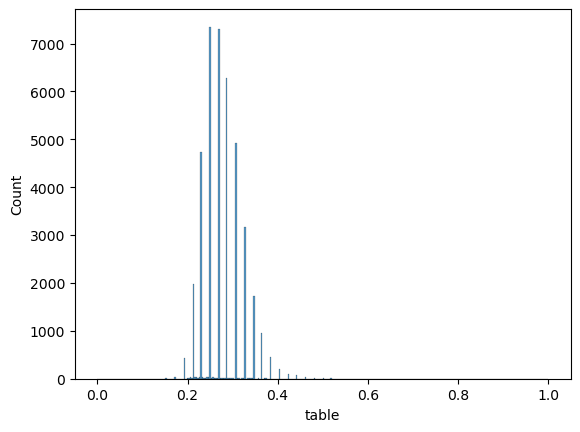

In [426]:
min_max_scaler = MinMaxScaler()
df_train["table"] = min_max_scaler.fit_transform(df_train["table"].values.reshape(-1, 1))
df_test["table"] = min_max_scaler.fit_transform(df_test["table"].values.reshape(-1, 1))
sns.histplot(x=df_train.table);

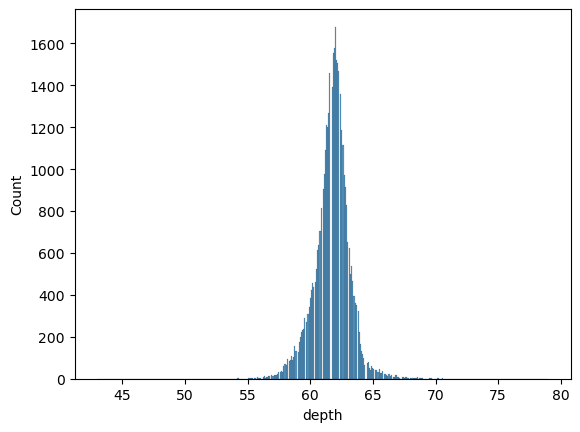

In [427]:
sns.histplot(x=df_train.depth);

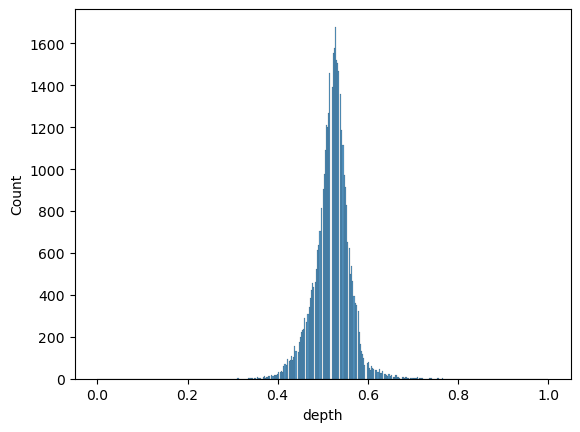

In [428]:
df_train["depth"] = min_max_scaler.fit_transform(df_train["depth"].values.reshape(-1, 1))
df_test["depth"] = min_max_scaler.fit_transform(df_test["depth"].values.reshape(-1, 1))
sns.histplot(x=df_train.depth);

In [429]:
# Processing is necessary, otherwise we won't be able to fit a model
# For the sake of the example, we'll just drop categorical columns

df_train_cleaned = df_train.select_dtypes(exclude='object')
print(df_train_cleaned.shape[0])
df_train_cleaned

40455


,id,clarity,depth,table,z,price,D,H,E,G,F,I,J
0,0,1,0.561111,0.288462,4.03,8.928,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.500000,0.269231,2.77,6.477,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,3,0.486111,0.288462,2.67,6.810,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,4,0.511111,0.250000,2.87,6.824,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,4,0.522222,0.250000,4.69,9.776,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,4,0.533333,0.230769,4.23,9.149,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40451,40451,1,0.588889,0.250000,4.62,9.077,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,4,0.525000,0.230769,4.06,8.892,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40453,40453,3,0.475000,0.288462,2.64,6.385,1.0,0.0,0.0,0.0,0.0,0.0,0.0


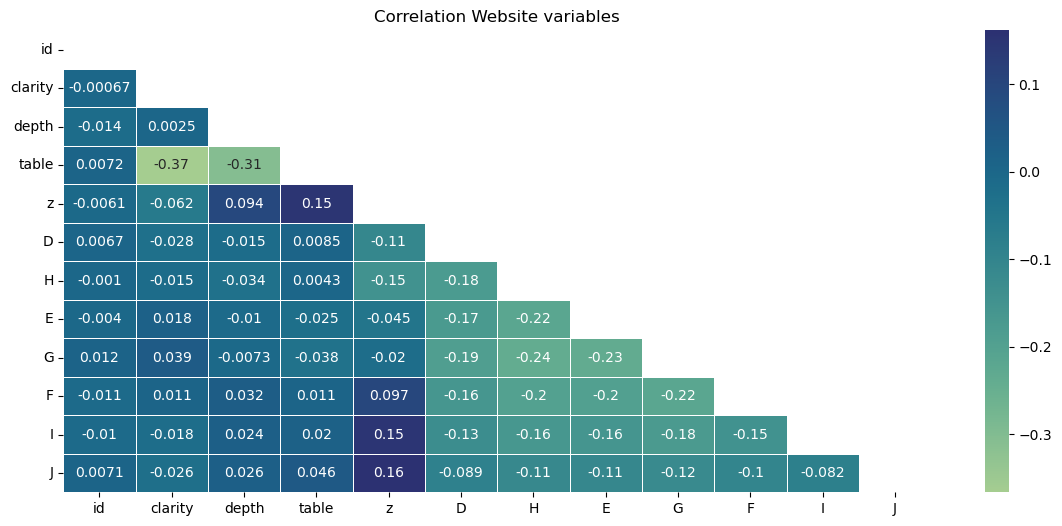

In [430]:
corrt = df_test.corr()

def heatmap_titanic ():
    plt.figure(figsize=(14, 6))
    mask = np.triu(np.ones_like(df_test.corr()), k=0)
    plt.title("Correlation Website variables")
    sns.heatmap(df_test.corr(), annot=True, cmap='crest', linewidths=0.5, mask=mask)
    
heatmap_titanic()

# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [431]:
X = df_train.drop(columns=['price'])
y = df_train_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

## Fit

In [432]:
# model_Elastic = ElasticNet()
# model_Lasso = Lasso()
# model_Ridge = Ridge()
# model_Linear = LinearRegression()
# model_SVR = SVR()
# model_Gradient = GradientBoostingRegressor()
# model_Random = RandomForestRegressor()
# model_Decision = DecisionTreeRegressor()
# model_Cat = CatBoostRegressor()
# model_LGBMRegressor = LGBMRegressor()
# model_XGBRegressor = XGBRegressor()
# model_KNeighbors = KNeighborsRegressor()
# models = [
#   model_Elastic,
#   model_Lasso,
#   model_Ridge,
#   model_Linear,
#   model_SVR,
#   model_Gradient,
#   model_Random,
#   model_Decision,
#   model_Cat,
#   model_LGBMRegressor,
#   model_XGBRegressor,
#   model_KNeighbors
# ]


# for model in models:
#     regressor = model
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     error = np.sqrt(mean_squared_error(y_pred, y_test))
#     print(f"The {type(model).__name__} has an error of: {error}")

In [433]:
regressor = GradientBoostingRegressor(n_estimators=10000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_pred, y_test))
print(f"The {type(regressor).__name__} has an error of: {error}")

The GradientBoostingRegressor has an error of: 0.23057641651701705


-----
-----
-----
-----


# Applying same cleaning & processing to my `test.csv`

In [434]:
df_test_cleaned = df_test.select_dtypes(exclude='object')
print(df_test_cleaned.shape[0])
df_test_cleaned.sample()

13485


,id,clarity,depth,table,z,D,H,E,G,F,I,J
4555,4555,2,0.527778,0.413793,4.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Predict on the `test.csv`

In [435]:
y_pred = regressor.predict(df_test_cleaned)
y_pred
# Just for feedback
# if platform == "darwin":
#    os.system("say -v ayam don predictin")

array([8.43984657, 7.5966779 , 7.04234987, ..., 9.2407296 , 6.95932987,
       9.72964275])

# DF with two columns

In [436]:
print(df_test_cleaned.shape[0])
df_test_cleaned.sample()

13485


,id,clarity,depth,table,z,D,H,E,G,F,I,J
6956,6956,4,0.502778,0.344828,2.83,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [437]:
df_test_cleaned['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_cleaned[["id", "price"]] # Modifying for subnmission

In [438]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
45,45,6.572633


# Export (index=False)

In [439]:
df_for_submission.to_csv("my_submission.csv", index=False)

#  Just for feedback
# if platform == "darwin":
#    os.system("say redi for submission")

In [440]:
df_for_submission.head()

,id,price
0,0,8.439847
1,1,7.596678
2,2,7.042350
3,3,9.344876
4,4,7.343860
